<a href="https://colab.research.google.com/github/jong9810/TensorFlow-2.0/blob/main/10_1_Transfer_Learning_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10. 전이 학습 (Transfer Learning)

## CNN 모델 구축시 문제점 : 학습 데이터 부족
- CNN 모델의 품질을 높이기 위해서는, 즉, 임의의 데이터에 대해 정확도는 높이고 오버피팅은 줄이기 위해서는 기본적으로 많은 양의 데이터를 이용하여 학습하여아 한다.
- 그러나 많은 데이터를 확보하려면 많은 비용과 시간이 소요되기 때문에 현실적으로 쉽지 않은데, 이러한 데이터가 부족한 어려움을 해결하기 위해 등장한 것이 전이학습이다.

## 전이 학습의 개념 및 필요성 
- 전이 학습(Transfer Learning)이란 아주 큰 데이터 셋, 예를 들어, 21,841 부류에 대해서 총 1419만 7122장의 이미지로 구성되어 있는 ImageNet 데이터를 사용해서 학습된 모델의 가중치를 가져와서, 우리가 해결하려는 문제에 맞게 보정하여 사용하는 것을 의미한다.
- 이때 큰 데이터 셋을 사용해서 훈련된 모델을 사전 학습 모델(pre-trained model)이라고 함.


## 사전 학습 모델(Pre-Trained Model) 구조

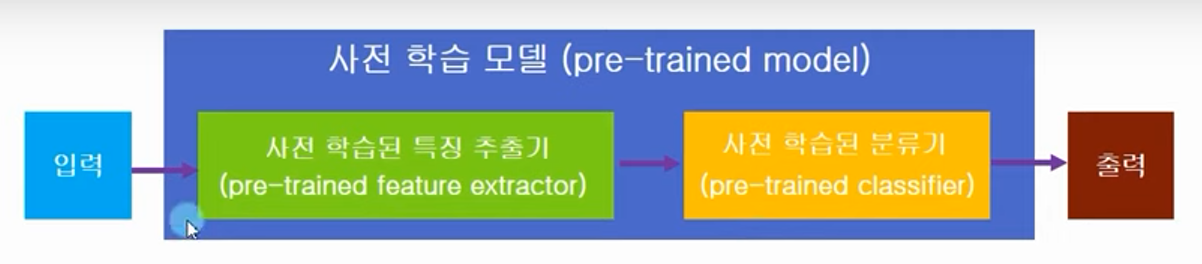

### 사전 학습된 특징 추출기
- 특징 추출기(feature extractor)는 컨볼루션 층과 풀링 층의 조합으로 구성되어 있으며 ImageNet 데이터에 대해 이미 학습되어 있음
- 특징 추출기의 출력 데이터를 bottleneck 또는 feature vector 등으로 지칭함

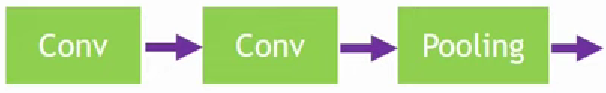

### 사전 학습된 분류기
- 분류기(classifier)는 완전 연결층으로 구성되며 추출된 특징을 입력으로 받아 최종적으로 주어진 이미지에 대한 클래스(정답)을 카테고리 형태로 분류하는 역할을 수행함
- 오버피팅을 줄이기 위해 출력층 이전의 Dense layer사이에는 Dropout, BatchNormalization layer 등을 add할 수 있음

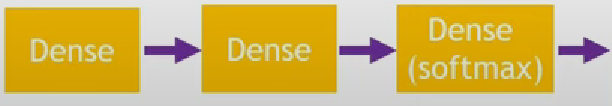

# 사전 학습 모델(Pre-Trained Model) 종류

- 아래의 표는 Tensorflow가 제공하는 사전 학습 모델이 이름과 크기, ImageNet 데이터에 대한 1순위와 5순위 정확도, 파라미터 개수 및 층의 깊이 등을 나타내고 있다.
- 우리가 사용할 데이터 셋에서 어떤 구조의 모델이 최고의 성능을 낼지 모르기 때문에, 다양한 모델을 사용하여 학습시켜보고 결과를 비교해 보는 것도 중요하다.

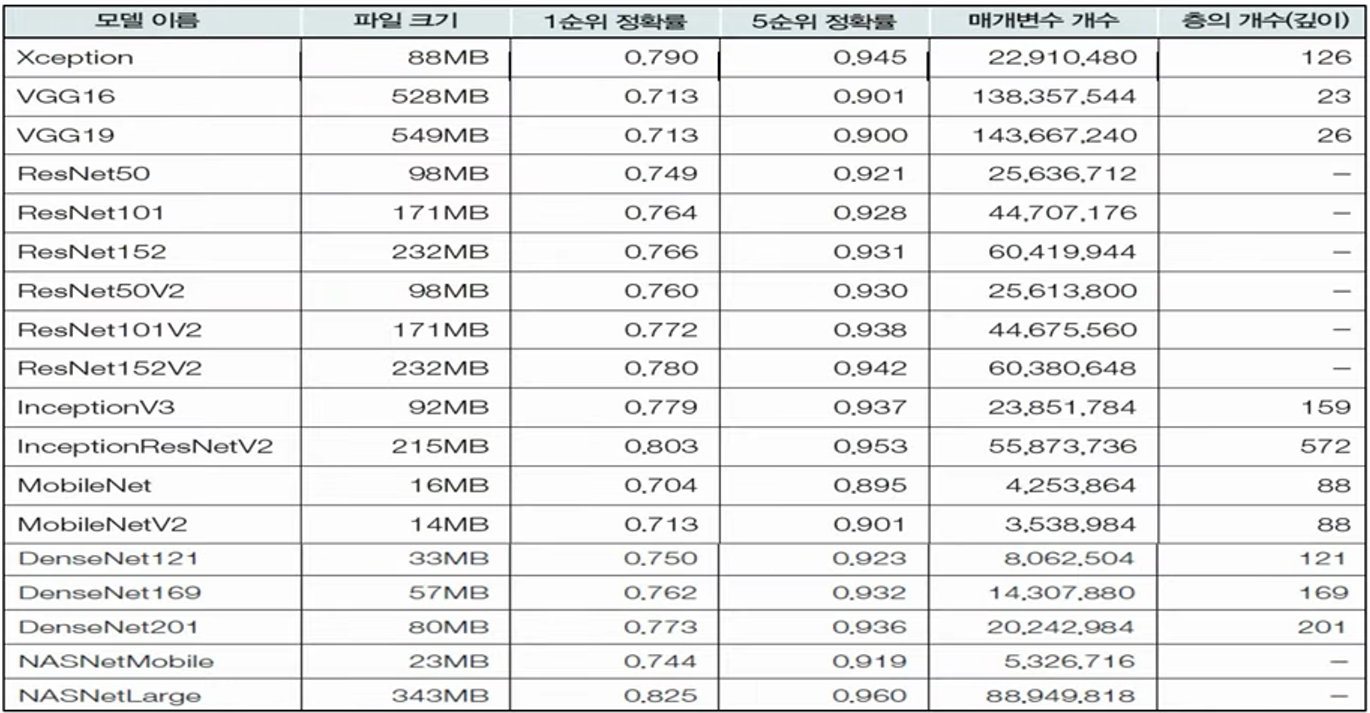

# 파인 튜닝(Fine Tuning) : 사전 학습 모델의 학습 방법

- 사전 학습 모델의 가중치를 미세하게 조정하는 기법이다.
- 새롭게 분류하려는 데이터의 종류와 전체 개수를 미리 분석한 후, 그것을 바탕으로 사전 학습 모델 가중치 일부만을 재학습 시키거나 또는 모든 가중치를 처음부터 다시 학습시킬 수 있다.
- 파인 튜닝 진행 시 많은 연산량이 필요하므로 일반적으로 CPU보다는 GPU를 많이 사용한다.

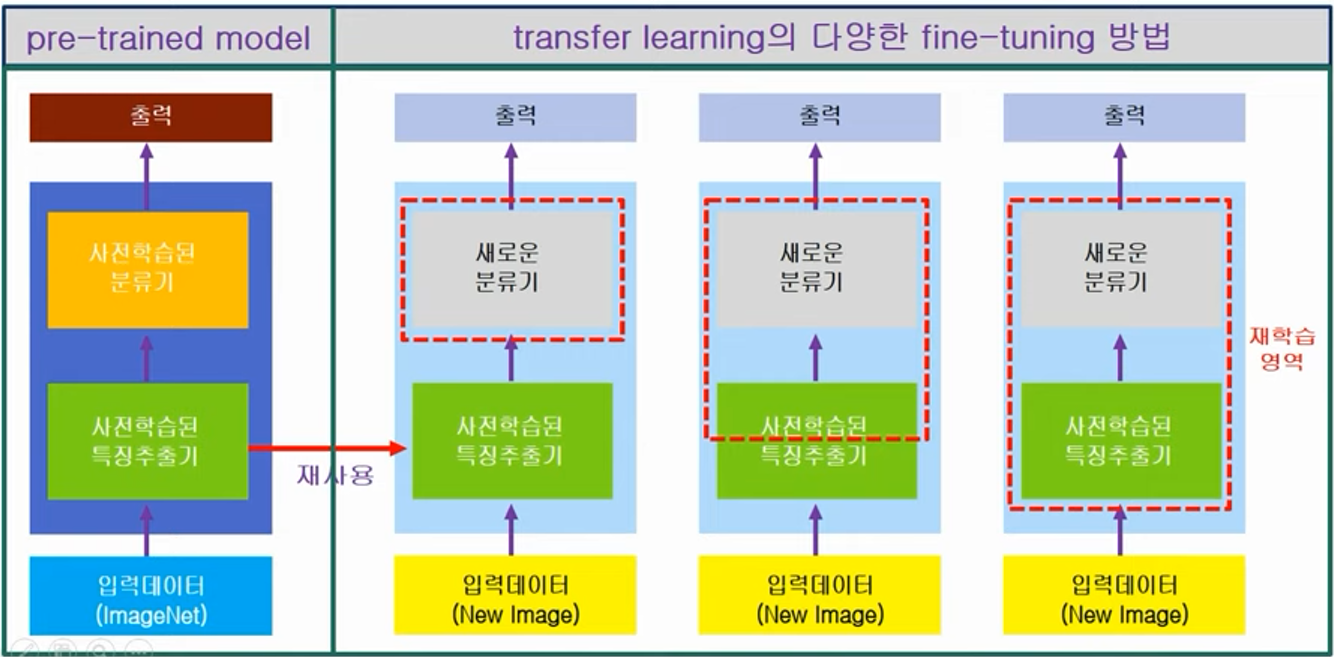

### 파인 튜닝은 다음 3가지 방법 중 선택 (데이터의 유사도와 개수 등 고려)
1. 새로운 분류기만 학습시키는 경우
1. 새로운 분류기와 사전 학습된 특징 추출기 일부를 학습시키는 경우
1. 모델의 전체 레이어를 처음부터 다시 학습시키는 경우 (일반적으로 가장 많이 쓰임 -> 학습률을 아주 낮게 설정하여 학습시킴)

# Transfer Learning 사용법

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3 # tensorflow에서 제공하는 다양한 사전 학습 모델

In [ ]:
# weights : 사전학습에 사용된 데이터 셋 (일반적으로 'imagenet')
# include_top : False일 경우, 사전학습 모델의 특징 추출기만 가져오고, True일 경우, 사전학습 모델의 특징 추출기와 분류기 모두 가져옴
# input_shape : 새롭게 학습시킬 이미지 텐서의 크기
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(240,240,3))
base_model.summary() # summary를 보면 Conv2D와 MaxPooling2D로 이루어진 특징 추출기만 가져왔다는 것을 알 수 있음

In [ ]:
model = Sequential()

# 사전 학습된 모델의 특징 추출기 부분을 가져옴
model.add(base_model)

# 새로운 분류기 정의
# Flatten() : 특징 추출기 출력값(텐서)을 1차원 벡터로 변환하는 역할
# Flatten()이외에 GlobalAveragePooling2D()함수를 사용해도 된다.
model.add(GlobalAveragePooling2D())
# model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax')) # 출력층 : 새로운 데이터의 정답 개수와 동일한 노드 수로 정의

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()